In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("../data/raw/external_features.csv")
df.head()

,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl,Camera,Size,Title,Description,...,Day21,Day22,Day23,Day24,Day25,Day26,Day27,Day28,Day29,Day30
0,23647573678,32659680@N00,https://farm5.staticflickr.com/4507/2364757367...,1507147765,1507147765,1507155322,NaN,0,image,NaN,...,18.0,18.0,18.000000,18.0,18.0,18.0,18.0,18.0,18.0,18.000000
1,23647582078,78682984@N00,https://farm5.staticflickr.com/4477/2364758207...,1507147800,1507147800,1507151128,NaN,0,20171004_215401,NaN,...,7.0,7.0,8.843192,9.0,9.0,9.0,9.0,9.0,9.0,9.000000
2,23647582388,14305351@N00,https://farm5.staticflickr.com/4477/2364758238...,1507147801,1507147801,1507149986,NaN,1166400,Always good to see Sergio at the Italian pavil...,on Instagram <a href= http://ift.tt/2xia4c9 r...,...,10.0,10.0,10.000000,11.0,11.0,11.0,11.0,11.0,11.0,11.000000
3,23647583748,54533346@N03,https://farm5.staticflickr.com/4466/2364758374...,1507147805,1507147805,1507150476,NaN,0,2017 - September - AESHM - Mary Alice Gallery-...,NaN,...,10.0,10.0,10.000000,11.0,11.0,11.0,11.0,11.0,11.0,12.048102
4,23647586378,152637408@N06,https://farm5.staticflickr.com/4495/2364758637...,1507147811,1507147811,1507154551,NaN,2457600,Grand Elk. CP 14,NaN,...,117.0,118.0,120.000000,120.0,120.0,120.0,120.0,121.0,121.0,121.000000


/var/folders/t8/cq9vwh6d7dxfyjzswff4ys5m0000gn/T/ipykernel_17080/3723904470.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize='small')  # Agregar leyenda para distinguir fotos


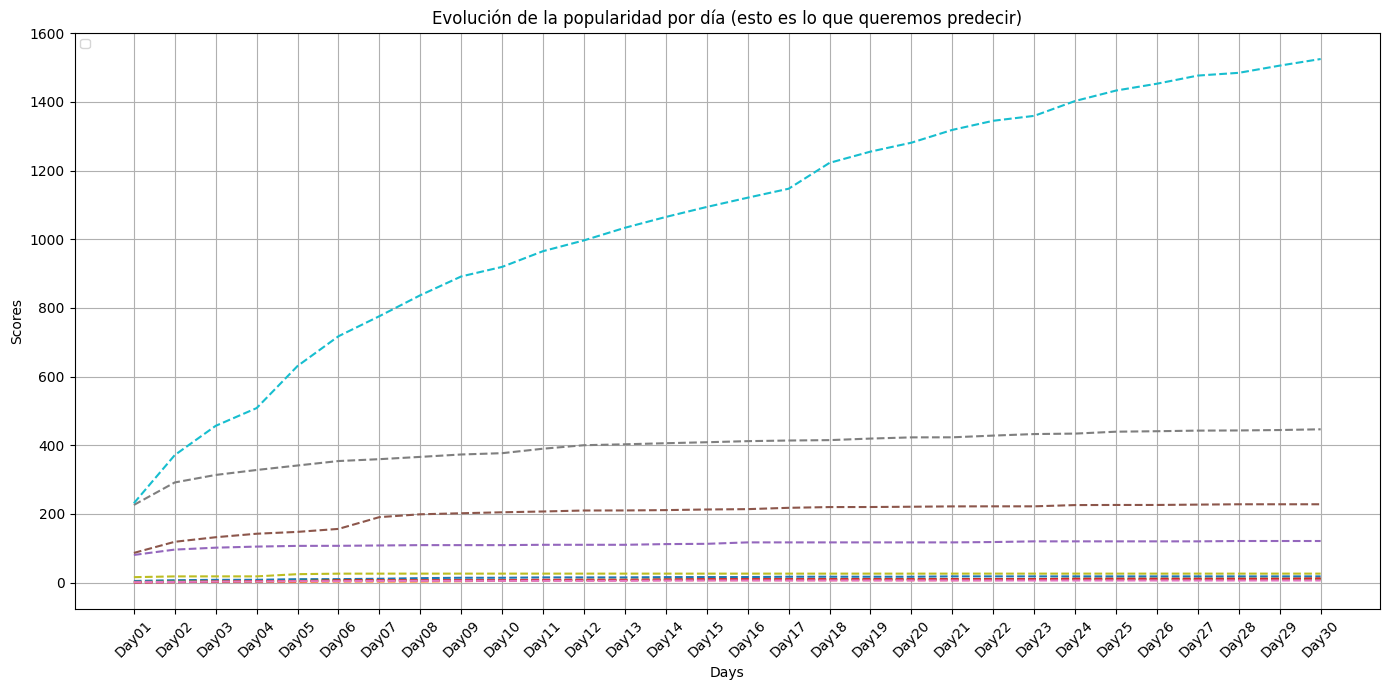

In [4]:
days = ['Day01', 'Day02', 'Day03', 'Day04', 'Day05', 'Day06', 'Day07', 'Day08', 'Day09', 'Day10', 'Day11', 'Day12', 'Day13', 'Day14', 'Day15',
        'Day16', 'Day17', 'Day18', 'Day19', 'Day20', 'Day21', 'Day22', 'Day23', 'Day24', 'Day25', 'Day26', 'Day27', 'Day28', 'Day29', 'Day30']
plt.figure(figsize=(14,7))
for i in range(10):
    scores = []
    for day in days:
        scores.append(df[day][i])
    scores = np.array(scores) 
    # scores = scores/np.max(scores)
    plt.plot(days, scores, ls='--')

plt.xlabel('Days')
plt.ylabel('Scores')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para legibilidad
plt.legend(loc='upper left', fontsize='small')  # Agregar leyenda para distinguir fotos
plt.title('Evolución de la popularidad por día (esto es lo que queremos predecir)')
plt.tight_layout()  # Ajustar el diseño para que no se superpongan las etiquetas
plt.show()


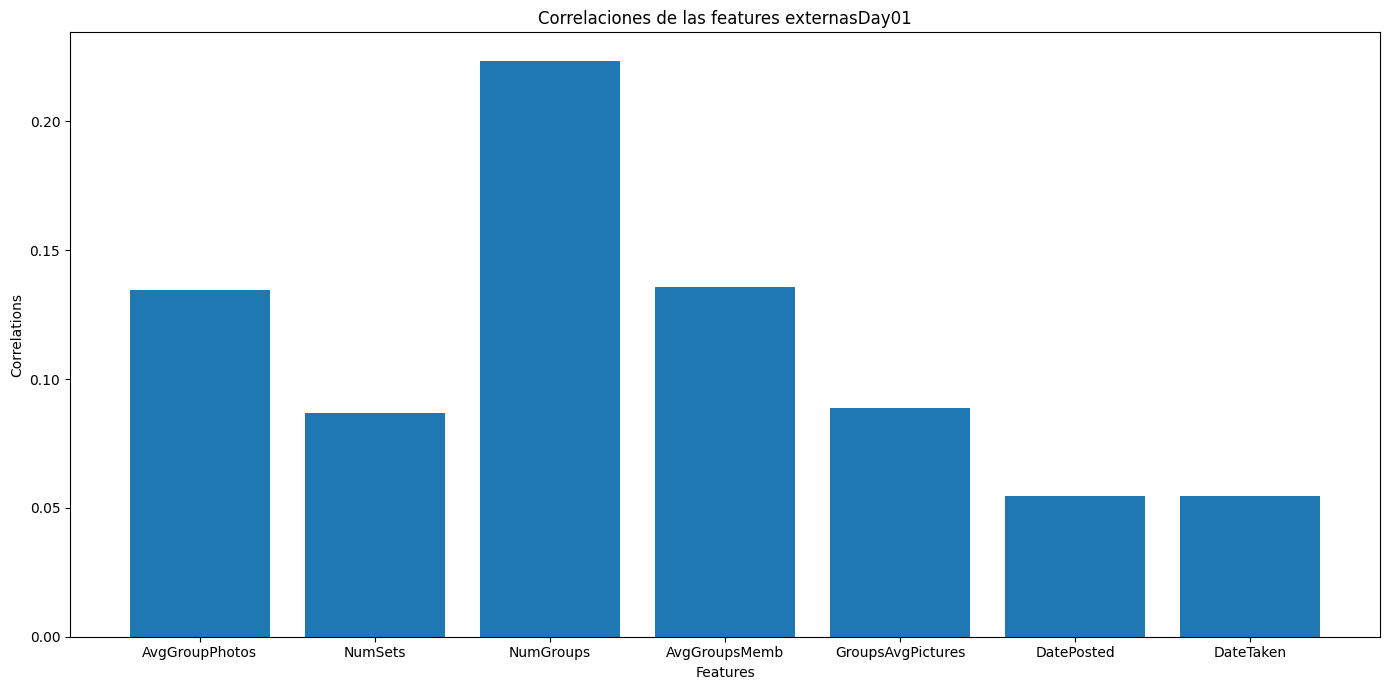

In [ ]:
def correlation(target, features, df):
    plt.figure(figsize=(14,7))
    # Asegurar que features sea una lista
    if isinstance(features, str):
        features = [features]
    
    corrs = []
    for feature in features:
        corr = np.corrcoef(df[feature], df[target])[0, 1]  # Seleccionar solo la correlación
        corrs.append(corr)
    
    # Opcional: gráfica de barras
    plt.bar(features, corrs)
    plt.xlabel("Features")
    plt.ylabel("Correlations")
    plt.title(f"Correlaciones de las features externas{target}")
    plt.tight_layout()
    plt.show()

correlation("Day01", ["AvgGroupPhotos","NumSets","NumGroups","AvgGroupsMemb","GroupsAvgPictures", "DatePosted", "DateTaken"], df)